In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import re
from ipaddress import ip_address, IPv4Address, IPv6Address
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import precision_score,recall_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from kydavra import PointBiserialCorrSelector
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

In [2]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

In [3]:
## Create Dataset ##
url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')
url_df.drop(columns=url_df.columns[1:-1], inplace=True)
feature_fnc.parseurl(url_df)
cleaned_df=feature_fnc.feature_generator(url_df)
cleaned_df.set_index('url',inplace=True)

In [9]:
cleaned_df_c=feature_fnc.feature_generator_c(url_df)
cleaned_df_c.set_index('url',inplace=True)

In [10]:
cleaned_df_c

,status,https_true,hostname_isip
url,,,
http://www.crestonwood.com/router.php,legitimate,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,phishing,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,phishing,1,0
http://rgipt.ac.in,legitimate,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,legitimate,0,0
...,...,...,...
http://www.fontspace.com/category/blackletter,legitimate,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,phishing,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,legitimate,1,0


In [4]:
cleaned_df

,status,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,legitimate,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,phishing,0,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,phishing,1,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,legitimate,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,legitimate,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,legitimate,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,phishing,0,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,legitimate,1,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cleaned_df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [214]:
cleaned_df

,status,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,legitimate,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,phishing,0,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,phishing,1,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,legitimate,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,legitimate,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,legitimate,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,phishing,0,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,legitimate,1,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#cleaned_df=cleaned_df.loc[:, ~(cleaned_df == 0).all()]

In [95]:
#cleaned_df=cleaned_df.replace({'legitimate': False, 'phishing': True})

In [5]:
cleaned_df=cleaned_df.replace({'legitimate': 0, 'phishing': 1})

In [6]:
cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)

In [21]:
selector = VarianceThreshold()
selector.fit_transform(cleaned_df)


array([[  0,  37,   3, ...,   0,   0,   0],
       [  1,  77,   1, ...,   0,   0,   0],
       [  1, 126,   4, ...,   0,   0,   0],
       ...,
       [  0, 105,   2, ...,   0,   0,   0],
       [  0,  38,   2, ...,   0,   0,   0],
       [  1, 477,  24, ...,   0,   0,   0]], dtype=int64)

In [22]:
removed=cleaned_df.loc[:, ~selector.get_support()]

In [24]:
removed.columns

Index(['hostname_slash_count', 'hostname_questionmark_count',
       'hostname_equal_count', 'hostname_at_count', 'hostname_and_count',
       'hostname_exclamation_count', 'hostname_space_count',
       'hostname_space_encoded_count', 'hostname_comma_count',
       'hostname_tilde_count', 'hostname_plus_count',
       'hostname_asterisk_count', 'hostname_hashtag_count',
       'hostname_dollar_count', 'hostname_percent_count',
       'query_hashtag_count', 'file_slash_count', 'file_questionmark_count',
       'file_space_count', 'file_hashtag_count', 'file_dollar_count'],
      dtype='object')

In [25]:
cleaned_df=cleaned_df.loc[:, selector.get_support()]

In [26]:
cleaned_df

,phishing,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,37,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,77,1,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,126,4,2,1,5,1,3,0,2,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,18,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,55,2,0,2,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,45,2,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,84,5,0,0,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,105,2,1,6,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
features

,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,url_exclamation_count,...,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,37,3,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,77,1,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,126,4,2,1,5,1,3,0,2,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,18,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,55,2,0,2,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,45,2,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,84,5,0,0,5,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,105,2,1,6,5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
label

url
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                            0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                    1
https://support-appleld.com.se

In [79]:
def pointbiserialrcorr(features,label):
    corr_value=[]
    p_value=[]
    df = pd.DataFrame()
    for i in range(len(features.axes[1])):
        print(features.iloc[:,i])
        corr, p=stats.pointbiserialr(features.iloc[:,i],label)
        corr_value.append(corr)
        p_value.append(p)
        print(corr_value)
        print(p_value)
    return corr_value,p_value

In [65]:
features.iloc[:,2]

url
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                             0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                     0
https://support-appleld.com.

In [82]:
len(r)

55

In [83]:
len(p)

55

In [85]:
test =pd.Series(r)

In [86]:
test.index = features.columns

<Axes: >

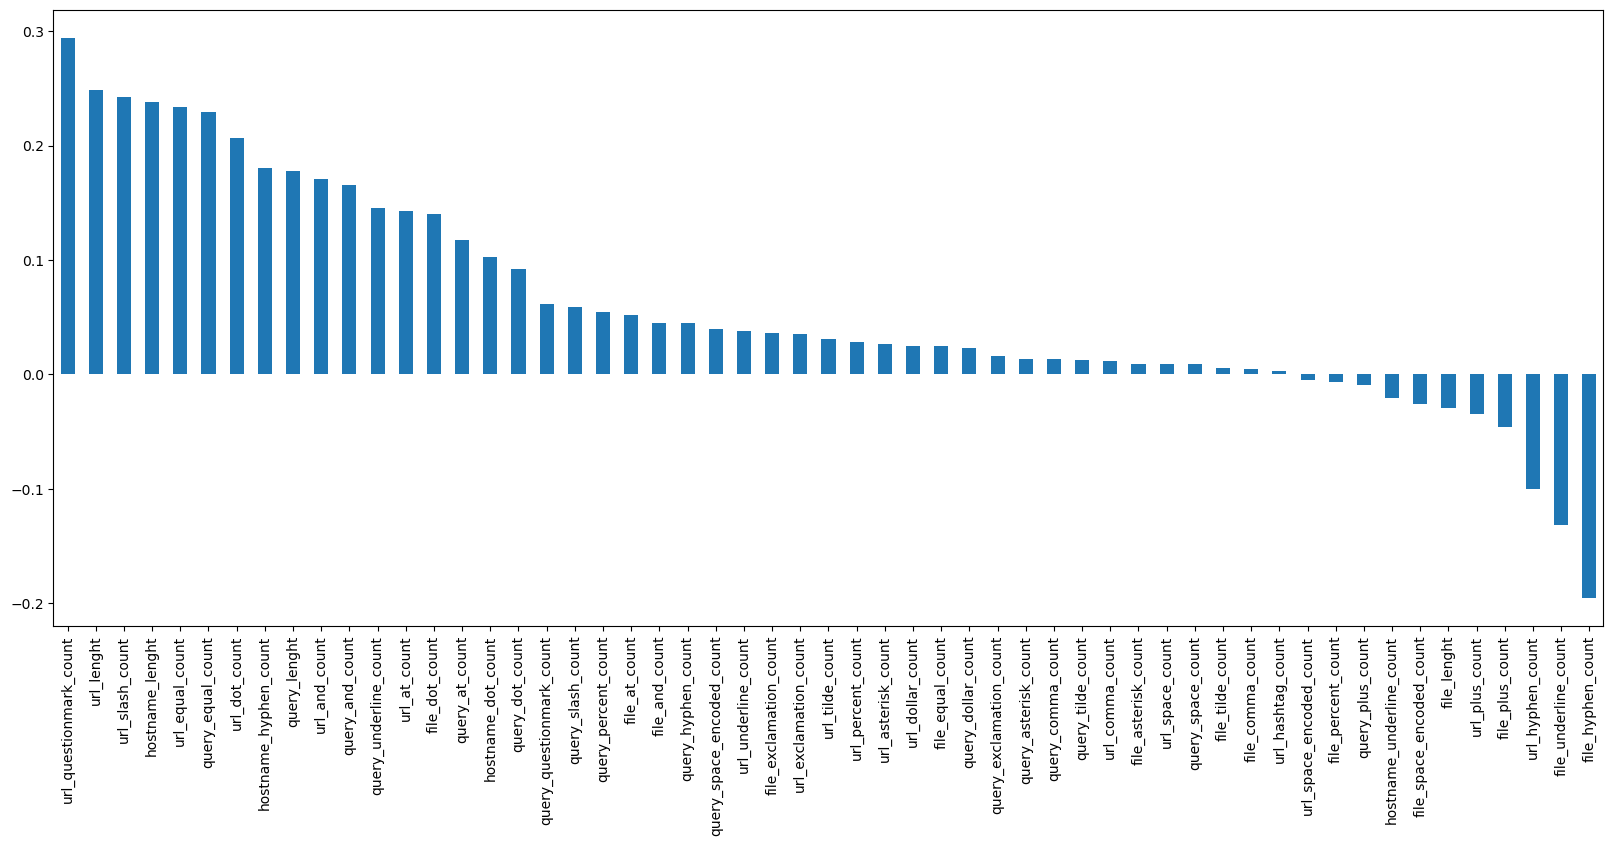

In [88]:
test.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [100]:
new_columns

['url_lenght',
 'url_dot_count',
 'url_slash_count',
 'url_questionmark_count',
 'url_equal_count',
 'hostname_lenght',
 'query_equal_count',
 'url_hyphen_count',
 'url_at_count',
 'url_and_count',
 'hostname_dot_count',
 'hostname_hyphen_count',
 'query_lenght',
 'query_underline_count',
 'query_at_count',
 'query_and_count',
 'file_dot_count',
 'file_underline_count',
 'file_hyphen_count']

In [87]:
test

url_lenght                   0.248482
url_dot_count                0.206965
url_underline_count          0.038091
url_hyphen_count            -0.100107
url_slash_count              0.242270
url_questionmark_count       0.294319
url_equal_count              0.233386
url_at_count                 0.142915
url_and_count                0.170546
url_exclamation_count        0.035525
url_space_count              0.009354
url_space_encoded_count     -0.005134
url_comma_count              0.011865
url_tilde_count              0.031089
url_plus_count              -0.034711
url_asterisk_count           0.026465
url_hashtag_count            0.002651
url_dollar_count             0.024962
url_percent_count            0.028101
hostname_lenght              0.238322
hostname_dot_count           0.102622
hostname_underline_count    -0.020421
hostname_hyphen_count        0.180742
query_lenght                 0.177893
query_dot_count              0.092168
query_underline_count        0.145758
query_hyphen

In [80]:
r,p=pointbiserialrcorr(features,label)

url
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                             37
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                     77
https://support-appleld.co

In [73]:
test

,"(Correlation, p-value)"
0,-0.006944
1,0.457913


In [94]:
features.iloc[:,0]

url
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                             37
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                     77
https://support-appleld.co

In [126]:

stats.pointbiserialr(cleaned_df.iloc[:,0],cleaned_df.iloc[:,1])

SignificanceResult(statistic=0.2484820019691818, pvalue=2.1043028309225086e-160)

In [7]:
#cleaned_df.set_index('url',inplace=True)
features=cleaned_df.loc[:,'url_lenght':]
label=cleaned_df.loc[:,'phishing']

In [10]:
#cleaned_df.set_index('url',inplace=True)
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [11]:
features

,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,37,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,0,77,1,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,126,4,2,1,5,1,3,0,2,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,18,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,55,2,0,2,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,45,2,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,0,84,5,0,0,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,1,105,2,1,6,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
cleaned_df

,phishing,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,0,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,1,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,0,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,1,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
selectorpoint=PointBiserialCorrSelector()

In [133]:
selectorpoint.pointBiserialCorr(cleaned_df,'hostname_dot_count','phishing')

-0.10262215154266235

In [107]:
selectorpoint.min_corr 

0

In [111]:
new_columns = selectorpoint.select(cleaned_df, 'phishing')

In [112]:
new_columns

['url_lenght',
 'url_dot_count',
 'url_slash_count',
 'url_questionmark_count',
 'url_equal_count',
 'hostname_lenght',
 'query_equal_count',
 'url_hyphen_count',
 'url_at_count',
 'url_and_count',
 'hostname_dot_count',
 'hostname_hyphen_count',
 'query_lenght',
 'query_underline_count',
 'query_at_count',
 'query_and_count',
 'file_dot_count',
 'file_underline_count',
 'file_hyphen_count']

In [29]:
fs = SelectKBest(score_func=f_classif, k='all')

In [40]:
anova =pd.Series(fs.scores_)
anova.index = X_train.columns
#anova.sort_values(ascending=False)

In [74]:
anova

url_lenght                    752.035660
url_dot_count                 511.419604
url_underline_count            16.605549
url_hyphen_count              115.685173
url_slash_count               712.588615
url_questionmark_count       1083.820367
url_equal_count               658.332459
url_at_count                  238.278772
url_and_count                 342.353274
url_exclamation_count          14.440435
url_space_count                 1.000000
url_space_encoded_count         0.301247
url_comma_count                 1.608944
url_tilde_count                11.056074
url_plus_count                 13.785335
url_asterisk_count              8.009813
url_hashtag_count               0.080338
url_dollar_count                7.125276
url_percent_count               9.031624
hostname_lenght               688.168930
hostname_dot_count            121.632716
hostname_underline_count        4.767847
hostname_hyphen_count         385.934080
query_lenght                  373.470152
query_dot_count 

In [54]:
anova1 =pd.Series(fs.scores_)

In [55]:
fs.scores_

array([7.52035660e+02, 5.11419604e+02, 1.66055488e+01, 1.15685173e+02,
       7.12588615e+02, 1.08382037e+03, 6.58332459e+02, 2.38278772e+02,
       3.42353274e+02, 1.44404352e+01, 1.00000000e+00, 3.01246563e-01,
       1.60894388e+00, 1.10560737e+01, 1.37853354e+01, 8.00981251e+00,
       8.03379989e-02, 7.12527568e+00, 9.03162419e+00, 6.88168930e+02,
       1.21632716e+02, 4.76784721e+00, 3.85934080e+02, 3.73470152e+02,
       9.79114112e+01, 2.48061443e+02, 2.26264452e+01, 3.99485595e+01,
       4.38946280e+01, 6.34941597e+02, 1.59091398e+02, 3.21414301e+02,
       3.00105042e+00, 1.00000000e+00, 1.80988719e+01, 1.92369846e+00,
       1.80025205e+00, 9.12113761e-01, 2.00035008e+00, 6.06597840e+00,
       3.36034155e+01, 1.01785348e+01, 2.29732715e+02, 2.00849451e+02,
       4.52768203e+02, 6.79742656e+00, 3.10192264e+01, 2.33699565e+01,
       1.50368421e+01, 7.45524181e+00, 2.38301777e-01, 3.33372229e-01,
       2.43581682e+01, 1.00000000e+00, 5.51029480e-01])

<Axes: >

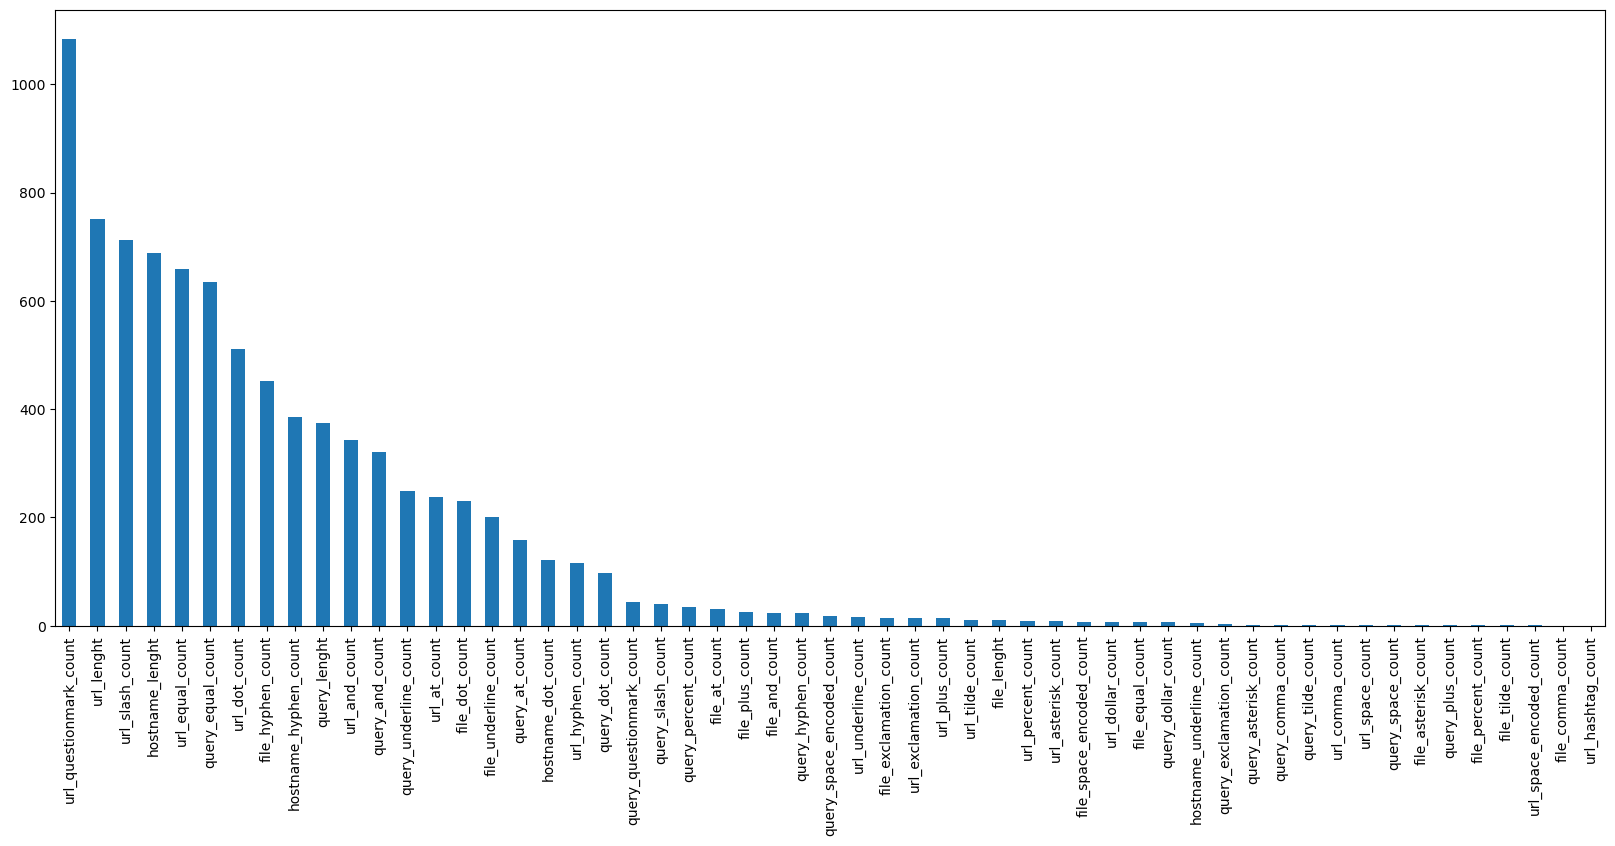

In [41]:
anova.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [30]:
features=fs.fit_transform(features, label)

In [31]:
features.shape[1]

55

In [34]:
X_train

array([[44,  2,  0, ...,  0,  0,  0],
       [88,  8,  0, ...,  0,  0,  0],
       [88,  3,  0, ...,  0,  0,  0],
       ...,
       [36,  3,  0, ...,  0,  0,  0],
       [26,  2,  0, ...,  0,  0,  0],
       [58,  4,  0, ...,  0,  0,  0]], dtype=int64)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [13]:
clf2 = svm.SVC(verbose=True)
clf2.fit(X_train, y_train)

[LibSVM]

SVC(verbose=True)

In [14]:
y_pred2 = clf2.predict(X_test)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7200349956255468


In [16]:
print("Accuracy:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.553918680023571


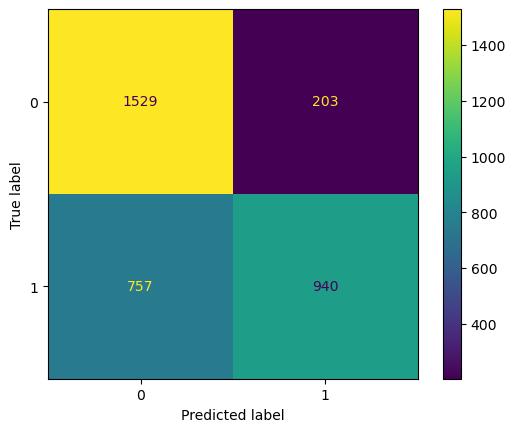

In [19]:
conf_mat = confusion_matrix(y_test,y_pred2)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()
displ.figure_.savefig('PoC_CM_all.png')


In [328]:
clf1 = svm.SVC(verbose=True)
clf1.fit(X_train, y_train)


[LibSVM]

SVC(verbose=True)

In [329]:
y_pred1 = clf1.predict(X_test)

In [330]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7200349956255468


In [323]:
print("Accuracy:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.553918680023571


In [18]:
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()
displ.figure_.savefig('PoC_CM_all.png')

NameError: name 'y_pred1' is not defined

In [ ]:

print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [222]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [88]:
selector = PointBiserialCorrSelector()


In [112]:
selector

0.8

In [105]:
new_columns = selector.select(cleaned_df, 'phishing')

In [205]:
selector = VarianceThreshold(threshold=0.00)
selector.fit_transform(cleaned_df)


array([[  0,   0,  37, ...,   0,   0,   0],
       [  1,   0,  77, ...,   0,   0,   0],
       [  1,   1, 126, ...,   0,   0,   0],
       ...,
       [  0,   1, 105, ...,   0,   0,   0],
       [  0,   0,  38, ...,   0,   0,   0],
       [  1,   0, 477, ...,   0,   0,   0]], dtype=int64)

In [130]:
for feature in zip(features, selector.variances_):
    print(feature)

('https_true', 0.23769317439869445)
('url_lenght', 1629.0)
('url_dot_count', 1.875872873721056)
('url_underline_count', 1.1952783154949027)
('url_hyphen_count', 4.3555495545559)
('url_slash_count', 3.542560023391651)
('url_questionmark_count', 0.13281639007722462)
('url_equal_count', 0.9965501064335462)
('url_at_count', 0.024178088850004865)
('url_and_count', 0.6745361280846018)
('url_exclamation_count', 0.003493561555024344)
('url_space_count', 8.74814095307203e-05)
('url_space_encoded_count', 0.1405440549152704)
('url_comma_count', 0.010657469216172999)
('url_tilde_count', 0.0071275342550685085)
('url_plus_count', 0.04065968131936263)
('url_asterisk_count', 0.0006994226334131682)
('url_hashtag_count', 0.004355317352610016)
('url_dollar_count', 0.00594555164418971)
('url_percent_count', 2.1502889205778413)
('hostname_lenght', 116.13725477228732)
('hostname_dot_count', 0.7414264161861657)
('hostname_underline_count', 0.0014866940844992806)
('hostname_hyphen_count', 0.4238708208280614)


In [133]:
threshold_info = pd.Series(selector.variances_)
threshold_info.index = X_train.columns

In [199]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True])

In [206]:
removed=cleaned_df.loc[:, ~selector.get_support()]

In [207]:
removed

,hostname_slash_count,hostname_questionmark_count,hostname_equal_count,hostname_at_count,hostname_and_count,hostname_exclamation_count,hostname_space_count,hostname_space_encoded_count,hostname_comma_count,hostname_tilde_count,...,hostname_asterisk_count,hostname_hashtag_count,hostname_dollar_count,hostname_percent_count,query_hashtag_count,file_slash_count,file_questionmark_count,file_space_count,file_hashtag_count,file_dollar_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
removed

,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,37,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,0,77,1,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,126,4,2,1,5,1,3,0,2,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,18,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,55,2,0,2,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,45,2,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,0,84,5,0,0,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,1,105,2,1,6,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
threshold_info

https_true                0.237693
url_lenght             1629.000000
url_dot_count             1.875873
url_underline_count       1.195278
url_hyphen_count          4.355550
                          ...     
file_plus_count           0.005758
file_asterisk_count       0.000087
file_hashtag_count        0.000000
file_dollar_count         0.000000
file_percent_count        0.552622
Length: 78, dtype: float64

In [136]:
X_data_new = selector.fit_transform(features)

In [138]:
X_data_new.shape[1]

57

In [106]:
new_columns

['url_lenght',
 'url_dot_count',
 'url_slash_count',
 'url_questionmark_count',
 'url_equal_count',
 'hostname_lenght',
 'query_equal_count',
 'https_true',
 'url_hyphen_count',
 'url_at_count',
 'url_and_count',
 'hostname_dot_count',
 'hostname_hyphen_count',
 'query_lenght',
 'query_underline_count',
 'query_at_count',
 'query_and_count',
 'file_dot_count',
 'file_underline_count',
 'file_hyphen_count']

In [223]:
mutual_info = mutual_info_classif(X_train, y_train)

In [44]:
mutual_info['hostname_isip']

0.009891600456289673

In [122]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
#mutual_info.sort_values(ascending=False)

In [300]:
fs = SelectKBest(score_func=f_classif, k=35)

In [237]:
X_train

,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas,1,44,2,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html,0,88,8,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php,0,88,3,0,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834,1,154,6,0,4,7,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
http://sloaneandhyde.com/imm/new2015/document.php,0,49,2,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://psychologydictionary.org/passivity-phenomena/,0,52,1,0,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,0,41,3,0,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://demo.kinomilenium.mk/user.php,0,36,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
X_new=fs.fit_transform(X_train, y_train)

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [241]:
X_new

array([[ 1, 44,  2, ...,  0,  0,  0],
       [ 0, 88,  8, ...,  1,  0,  0],
       [ 0, 88,  3, ...,  1,  0,  0],
       ...,
       [ 0, 36,  3, ...,  1,  0,  0],
       [ 1, 26,  2, ...,  0,  0,  0],
       [ 0, 58,  4, ...,  1,  0,  0]], dtype=int64)

In [232]:
anova =pd.Series(fs.scores_)
anova.index = X_train.columns
#anova.sort_values(ascending=False)

In [233]:
anova

https_true                    94.434863
url_lenght                   505.597304
url_dot_count                354.648705
url_underline_count           20.018934
url_hyphen_count              94.379225
url_slash_count              483.519502
url_questionmark_count       736.925888
url_equal_count              442.253819
url_at_count                 155.897353
url_and_count                227.337694
url_exclamation_count          7.697085
url_space_count                0.991288
url_space_encoded_count        0.058352
url_comma_count                1.572203
url_tilde_count                3.898241
url_plus_count                 9.834908
url_asterisk_count             3.968116
url_hashtag_count              0.024191
url_dollar_count               4.535635
url_percent_count              6.009214
hostname_lenght              482.806463
hostname_dot_count            86.293972
hostname_underline_count       2.803442
hostname_hyphen_count        343.596947
hostname_isip                 60.363886


In [175]:
fs.scores_

array([9.44348628e+01, 5.05597304e+02, 3.54648705e+02, 2.00189342e+01,
       9.43792252e+01, 4.83519502e+02, 7.36925888e+02, 4.42253819e+02,
       1.55897353e+02, 2.27337694e+02, 7.69708530e+00, 9.91288119e-01,
       5.83522006e-02, 1.57220309e+00, 3.89824107e+00, 9.83490828e+00,
       3.96811597e+00, 2.41906052e-02, 4.53563537e+00, 6.00921409e+00,
       4.82806463e+02, 8.62939719e+01, 2.80344176e+00, 3.43596947e+02,
       6.03638864e+01, 2.38804736e+02, 6.61928429e+01, 1.65439529e+02,
       2.09505033e+01, 2.71819186e+01, 3.00370831e+01, 4.24412425e+02,
       1.04911953e+02, 2.13544050e+02, 2.97534573e+00, 9.91288119e-01,
       9.78383510e+00, 1.94788701e-01, 9.91288119e-01, 9.88434500e-02,
                  nan, 4.05839234e+00, 2.47027826e+01, 5.16624264e+00,
       1.64330449e+02, 1.23474528e+02, 3.08856900e+02, 5.66214381e+00,
       2.29841522e+01, 1.59139256e+01, 6.94939681e+00, 9.12458972e+00,
       8.10976052e-01, 3.82724140e-05, 1.77301319e+01, 9.91288119e-01,
      

<Axes: >

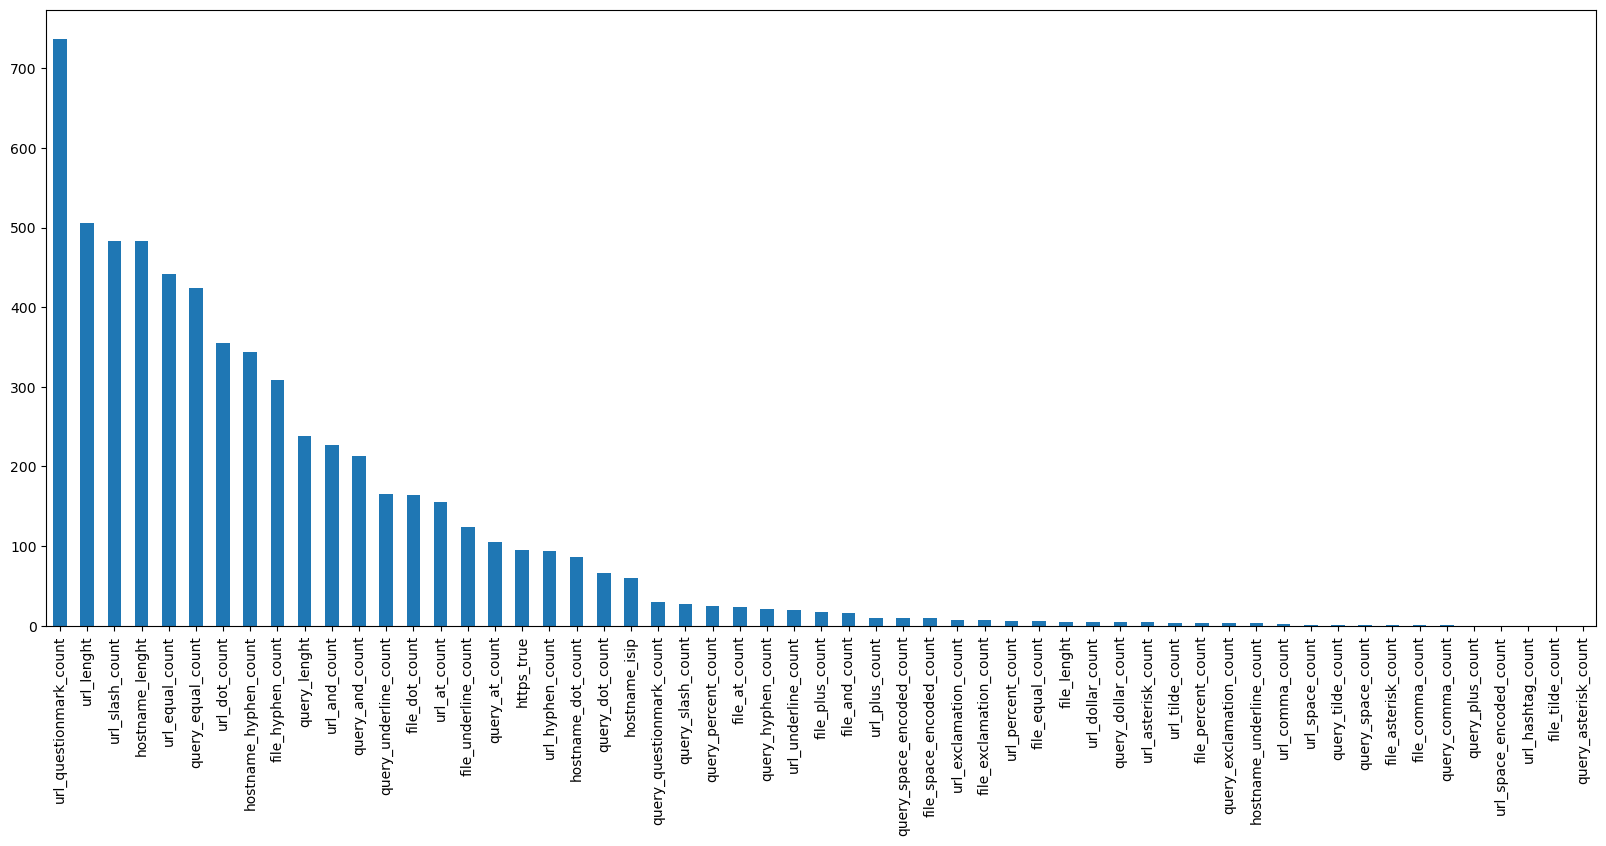

In [234]:
anova.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [31]:
anova

0      94.434863
1     505.597304
2     354.648705
3      20.018934
4      94.379225
         ...    
73     17.730132
74      0.991288
75           NaN
76           NaN
77      3.350916
Length: 78, dtype: float64

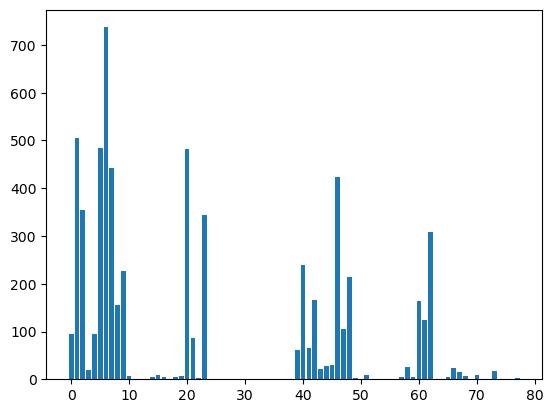

In [29]:

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

<Axes: >

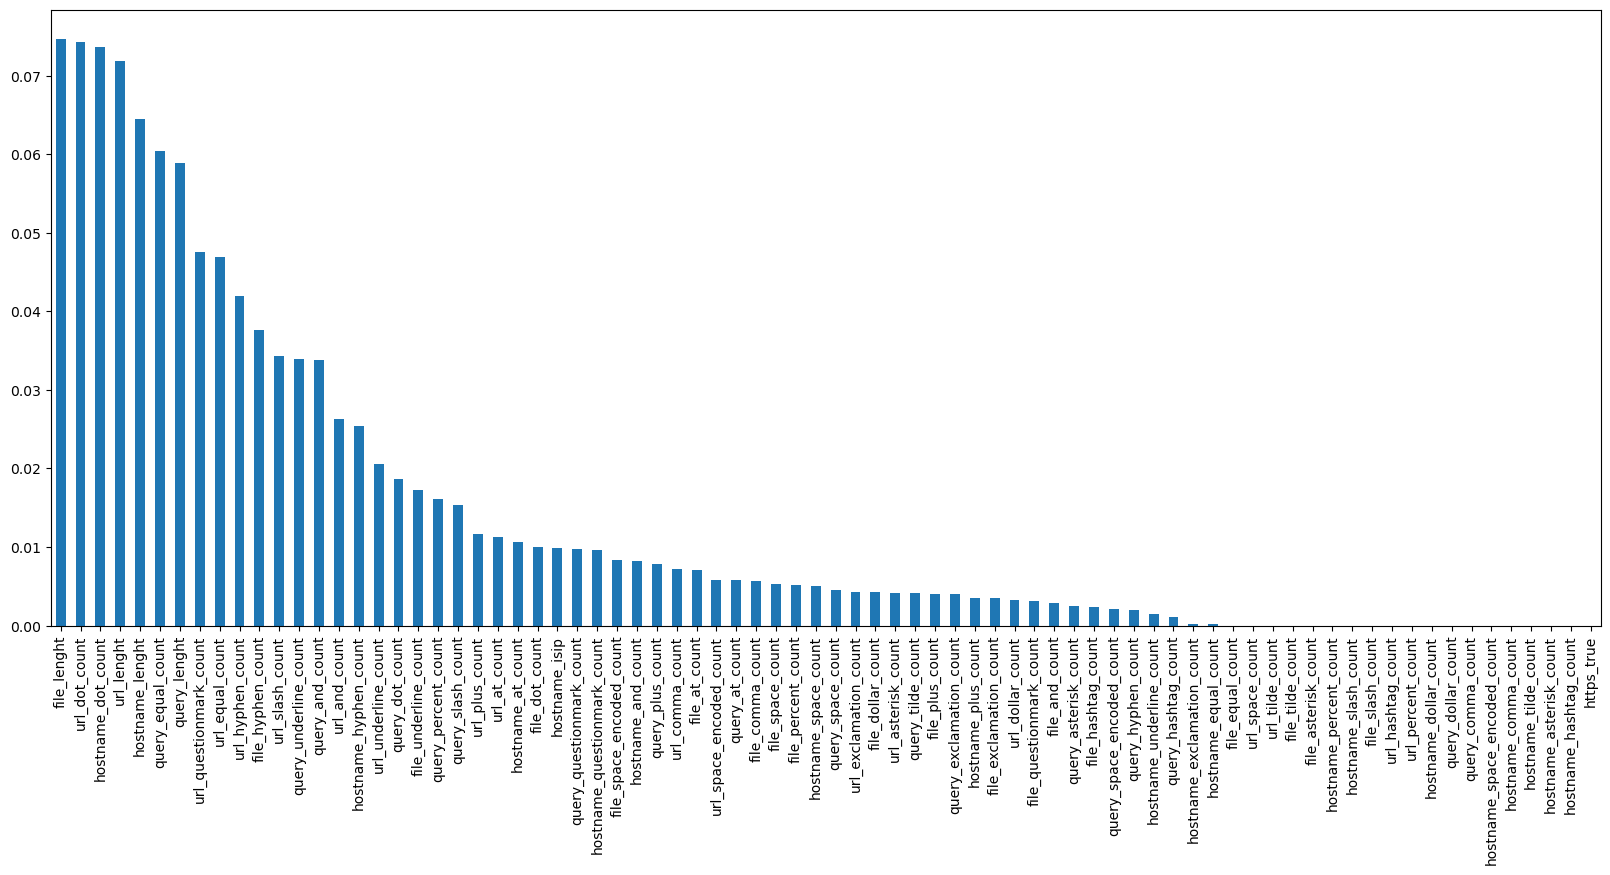

In [115]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [116]:
mutual_info

https_true             0.000000
url_lenght             0.071928
url_dot_count          0.074333
url_underline_count    0.020534
url_hyphen_count       0.041961
                         ...   
file_plus_count        0.004073
file_asterisk_count    0.000000
file_hashtag_count     0.002325
file_dollar_count      0.004214
file_percent_count     0.005183
Length: 78, dtype: float64

In [21]:
def hyperpara_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                     {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]}]
                    #{'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  grid=GridSearchCV(svm.SVC(),param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  grid.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(grid.best_estimator_)
  print('Best score for data:', grid.best_score_)
  print('Best C:',grid.best_estimator_.C) 
  print('Best Kernel:',grid.best_estimator_.kernel)
  print('Best Gamma:',grid.best_estimator_.gamma)
  #return model

In [22]:
hyperpara_opt(features,label)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=1000, gamma=0.001)
Best score for data: 0.8126860769210609
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.001


In [18]:
hyperpara_opt(X_train,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=100, gamma=0.01)
Best score for data: 0.8187739255372315
Best C: 100
Best Kernel: rbf
Best Gamma: 0.01


In [9]:
clf = svm.SVC(verbose=True)

In [242]:
clf1 = svm.SVC(verbose=True)
clf1.fit(X_new, y_train)
y_pred1 = clf1.predict(X_test)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [22]:
clf = svm.SVC(kernel='rbf',C=100,gamma=0.01,verbose=True)

[LibSVM]

SVC(verbose=True)

In [17]:
print("Accuracy:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.553918680023571


In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7200349956255468


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8568095654709827


In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8559346748323127


In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8110236220472441


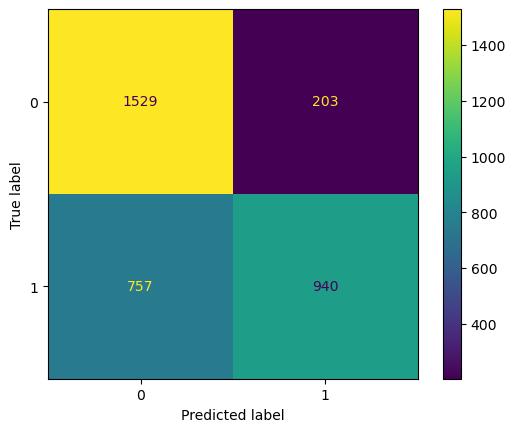

In [16]:
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


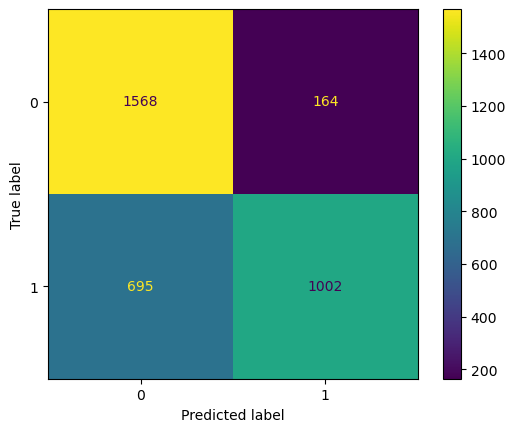

In [29]:
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred,normalize=False))

Accuracy: 2781
